In [128]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import partial_dependence
import numpy as np
from scipy.stats import norm
X = np.random.normal(0, 5, size= (1000 , 3))

B= np.array([1.22, -6.2, 0.2])
y = np.dot(X, B) + norm(0, 5).rvs(1000)
y_binary = y > 0.


rf_r_model = RandomForestRegressor()
rf_r_model.fit(X, y)

svm_model = SVC()
svm_model.fit(X, y_binary)

logit_model = LogisticRegression()
logit_model.fit(X, y_binary)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Plug in dummy classifier :

##### Works with a hack

In [97]:
def f(array):
    return (np.sum(X, axis=1) > 0.1).astype(float)


from sklearn.dummy import DummyRegressor
c = DummyRegressor()
c.fit(X, y)
c.predict = f

pdp, axes = partial_dependence.partial_dependence(c, [0, 1], X = X, method='exact')

### Use on classification model with exact method:

##### Fails due to bad error handling

In [104]:
pdp, axes = partial_dependence.partial_dependence(logit_model, [0, 1], X = X, method='exact')

ValueError: est requires a predict_proba method for method="exact" or "estimated" for classification.

In [109]:
pdp, axes = partial_dependence.partial_dependence(logit_model, [0, 1], X = X, method='estimated')

ValueError: est must be a fitted regressor or classifier model.

### Forest regressor model with estimated, exact, and recursive, using data

##### Works, though estimated is pretty bad

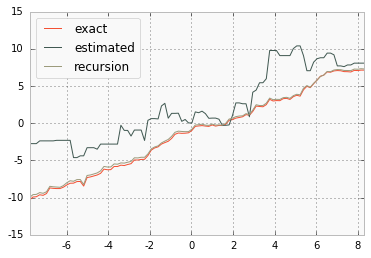

In [124]:
pdp_exact, axes_exact = partial_dependence.partial_dependence(rf_r_model, [0], X = X, method='exact')
pdp_est, axes_est = partial_dependence.partial_dependence(rf_r_model, [0], X = X, method='estimated')
pdp_rec, axes_rec = partial_dependence.partial_dependence(rf_r_model, [0], X = X, method='recursion')

ax = pd.DataFrame(pdp_exact[0], index = axes_exact[0], columns=['exact']).plot()
pd.DataFrame(pdp_est[0], index = axes_est[0], columns=['estimated']).plot(ax=ax)
pd.DataFrame(pdp_rec[0], index = axes_rec[0], columns=['recursion']).plot(ax=ax)

### Forest regressor model with estimated, exact, and recursive, using grid and data: 
##### Fails due requirement of either X or grid but not both

In [127]:
grid = [i / 10. for i in range(-70, 90)]
pdp_exact, axes_exact = partial_dependence.partial_dependence(rf_r_model, [0], grid = grid, X=X, method='exact')
pdp_est, axes_est = partial_dependence.partial_dependence(rf_r_model, [0], grid = grid, X=X, method='estimated')
pdp_rec, axes_rec = partial_dependence.partial_dependence(rf_r_model, [0], grid = grid, X=X,  method='recursion')

ax = pd.DataFrame(pdp_exact[0], index = axes_exact[0], columns=['exact']).plot()
pd.DataFrame(pdp_est[0], index = axes_est[0], columns=['estimated']).plot(ax=ax)
pd.DataFrame(pdp_rec[0], index = axes_rec[0], columns=['recursion']).plot(ax=ax)

ValueError: Either grid or X must be specified

### Multiclass classification: 
##### Fails due to bad error handling

In [132]:
def get_multiclass(x, Y):
    if x > np.percentile(Y, .66):
        return 1
    elif x < np.percentile(Y, .33):
        return -1
    else:
        return 0
y_multiclass = np.array(map(lambda x: get_multiclass(x, y), y))
rf_multi_model = RandomForestClassifier()
rf_multi_model.fit(X, y_multiclass)

pdp_exact, axes_exact = partial_dependence.partial_dependence(rf_multi_model, [0], X=X, method='exact')

ValueError: est requires a predict_proba method for method="exact" or "estimated" for classification.